In [2]:
import functools
from multiprocessing import Pool
import os

import numpy as np
import scipy.optimize as optimize
from scipy import integrate 
import matplotlib
from matplotlib import pyplot as plt
matplotlib.rc('xtick', labelsize="large") 
matplotlib.rc('ytick', labelsize="large") 
%matplotlib inline

import experiment

In [3]:
# load data
data2011 = np.loadtxt("data/emission/gt_2011.csv",skiprows=1,delimiter=',')
data2012 = np.loadtxt("data/emission/gt_2012.csv",skiprows=1,delimiter=',')
data2013 = np.loadtxt("data/emission/gt_2013.csv",skiprows=1,delimiter=',')
data2014 = np.loadtxt("data/emission/gt_2014.csv",skiprows=1,delimiter=',')
data2015 = np.loadtxt("data/emission/gt_2015.csv",skiprows=1,delimiter=',')
data = np.concatenate((data2011,data2012,data2013,data2014,data2015), axis=0)
y = data[:, -1]
x = data[:, :-2]
(n, d) = np.shape(x)

In [8]:
if __name__ ==  '__main__': 
    num_processors = os.cpu_count()
    num_trials = 1000
    n_dash = 10000
    ns = np.array([5000, 10000, 15000, 20000, 25000, 30000])
    
    sigma = 1.
    alpha = 0.3
    
    n_his = np.zeros((len(ns), num_trials, d))
    for j in range(len(ns)):
        expe = functools.partial(experiment.non_private_experiment, x=x, y=y, alpha=alpha)
        with Pool(processes = num_processors) as p:
            output = np.array(p.map(expe,np.ones(num_trials,dtype=int)*ns[j]))
        his[j] = output
    
    # np.save("outputs/appE3_non_private_his.npy", his)

In [3]:
# computes covariance matrix
ns = np.array([5000, 10000, 15000, 20000, 25000, 30000])
n_his = np.load("outputs/appE3_non_private_his.npy")
n_covs = np.zeros((len(ns)))
for j in range(len(ns)):
    n_covs[j] = np.linalg.norm(np.cov((n_his[j]-np.average(n_his[j], axis=0)).transpose()))

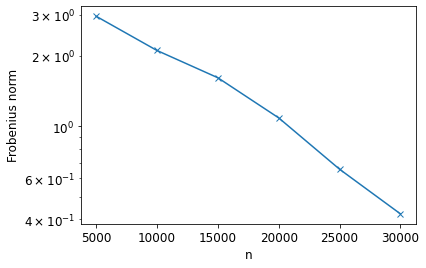

In [4]:
# plot the Frobenius norm of the covariance matix for each n 
plt.semilogy(ns, n_covs, "x-")
plt.xlabel("n",fontsize="large")
plt.ylabel("Frobenius norm",fontsize="large")
# if you want to save the figure, activate the following line
# plt.savefig("appE3_non_private.eps", bbox_inches='tight', )
plt.show()

In [23]:
# load the data 
his = np.load("outputs/sec4_his.npy")
ns = np.array([5000, 10000, 15000, 20000, 25000, 30000])
bias = np.average(his, axis=2)-np.average(n_his[-1], axis=0)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


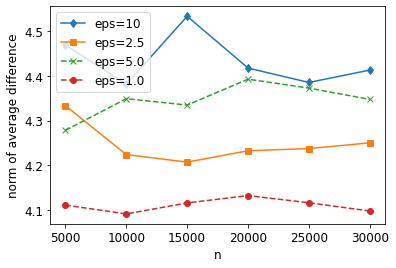

In [34]:
# plot = plt.semilogy # log scale
plot = plt.plot # linear scale
plot(ns, np.linalg.norm(bias[3], axis=1), "-d", label="eps=10")
plot(ns, np.linalg.norm(bias[1], axis=1), "-s", label="eps=2.5")
plot(ns, np.linalg.norm(bias[2], axis=1), "--x", label="eps=5.0")
plot(ns, np.linalg.norm(bias[0], axis=1), "--o", label="eps=1.0")
# plot(ns, 100000/ns, "--", label="O(1/n)")
plt.xlabel("n",fontsize="large")
plt.ylabel("norm of average difference",fontsize="large")
plt.legend(fontsize="large")
# plt.savefig("appE3_bias.eps") # save the figure
plt.show()